In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
dataset=pd.read_csv('Algerian_forest_fires_dataset.csv')

In [6]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          238 non-null    int64  
 1   month        238 non-null    int64  
 2   year         238 non-null    int64  
 3   Temperature  238 non-null    int64  
 4   RH           238 non-null    int64  
 5   Ws           238 non-null    int64  
 6   Rain         238 non-null    float64
 7   FFMC         238 non-null    float64
 8   DMC          238 non-null    float64
 9   DC           238 non-null    float64
 10  ISI          238 non-null    float64
 11  BUI          238 non-null    float64
 12  FWI          238 non-null    float64
 13  Classes      238 non-null    object 
 14  Region       238 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.0+ KB


In [8]:
#missing values
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [9]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [10]:
dataset.loc[:121, 'Region']=0
dataset.loc[121:, 'Region']=1

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          238 non-null    int64  
 1   month        238 non-null    int64  
 2   year         238 non-null    int64  
 3   Temperature  238 non-null    int64  
 4   RH           238 non-null    int64  
 5   Ws           238 non-null    int64  
 6   Rain         238 non-null    float64
 7   FFMC         238 non-null    float64
 8   DMC          238 non-null    float64
 9   DC           238 non-null    float64
 10  ISI          238 non-null    float64
 11  BUI          238 non-null    float64
 12  FWI          238 non-null    float64
 13  Classes      238 non-null    object 
 14  Region       238 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.0+ KB


In [12]:
dataset[['Region']]=dataset[['Region']].astype(int)

In [13]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [14]:
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [15]:
## Removing the null values
df=dataset.dropna().reset_index(drop=True)

In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [17]:
df.iloc[[121]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,1


In [18]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1


In [19]:
df = df.drop(122).reset_index(drop = True)

In [20]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire,1


In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [22]:
# Removing white spaces in columns
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          237 non-null    int64  
 1   month        237 non-null    int64  
 2   year         237 non-null    int64  
 3   Temperature  237 non-null    int64  
 4   RH           237 non-null    int64  
 5   Ws           237 non-null    int64  
 6   Rain         237 non-null    float64
 7   FFMC         237 non-null    float64
 8   DMC          237 non-null    float64
 9   DC           237 non-null    float64
 10  ISI          237 non-null    float64
 11  BUI          237 non-null    float64
 12  FWI          237 non-null    float64
 13  Classes      237 non-null    object 
 14  Region       237 non-null    int32  
dtypes: float64(7), int32(1), int64(6), object(1)
memory usage: 27.0+ KB


In [24]:
## Change the required columns as integer data type
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          237 non-null    int32  
 1   month        237 non-null    int32  
 2   year         237 non-null    int32  
 3   Temperature  237 non-null    int32  
 4   RH           237 non-null    int32  
 5   Ws           237 non-null    int32  
 6   Rain         237 non-null    float64
 7   FFMC         237 non-null    float64
 8   DMC          237 non-null    float64
 9   DC           237 non-null    float64
 10  ISI          237 non-null    float64
 11  BUI          237 non-null    float64
 12  FWI          237 non-null    float64
 13  Classes      237 non-null    object 
 14  Region       237 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.4+ KB


In [26]:
## Changing the other columns to float datatyoe
objects=[features for features in df.columns if df[features].dtypes=='O']

In [27]:
for i in objects:
    if i!='Classes':
        df[i] = df[i].astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          237 non-null    int32  
 1   month        237 non-null    int32  
 2   year         237 non-null    int32  
 3   Temperature  237 non-null    int32  
 4   RH           237 non-null    int32  
 5   Ws           237 non-null    int32  
 6   Rain         237 non-null    float64
 7   FFMC         237 non-null    float64
 8   DMC          237 non-null    float64
 9   DC           237 non-null    float64
 10  ISI          237 non-null    float64
 11  BUI          237 non-null    float64
 12  FWI          237 non-null    float64
 13  Classes      237 non-null    object 
 14  Region       237 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.4+ KB


In [29]:
objects

['Classes']

In [30]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,16.071730,7.540084,2012.0,32.172996,61.915612,15.556962,0.752743,78.118143,14.938397,50.332489,4.826160,16.987764,7.190295,0.489451
std,8.728431,1.102519,0.0,3.658000,14.930675,2.812262,2.014493,14.262317,12.436289,47.911663,4.169511,14.277565,7.467678,0.500947
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,9.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.600000,6.000000,14.700000,1.400000,6.200000,0.800000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.800000,11.500000,34.500000,3.800000,12.600000,4.900000,0.000000
75%,24.000000,9.000000,2012.0,35.000000,74.000000,17.000000,0.500000,88.300000,20.900000,71.300000,7.300000,22.900000,11.900000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [31]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [32]:
## Save the cleaned dataset
df.to_csv('Algerian_forest_fires_dataset.csv',index=False)

Exploratory Data Analysis

In [33]:
df_copy = df.drop(['day','month','year'],axis=1)

In [34]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [35]:
## Encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [36]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [37]:
df_copy['Classes'].value_counts()

Classes
1    136
0    101
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

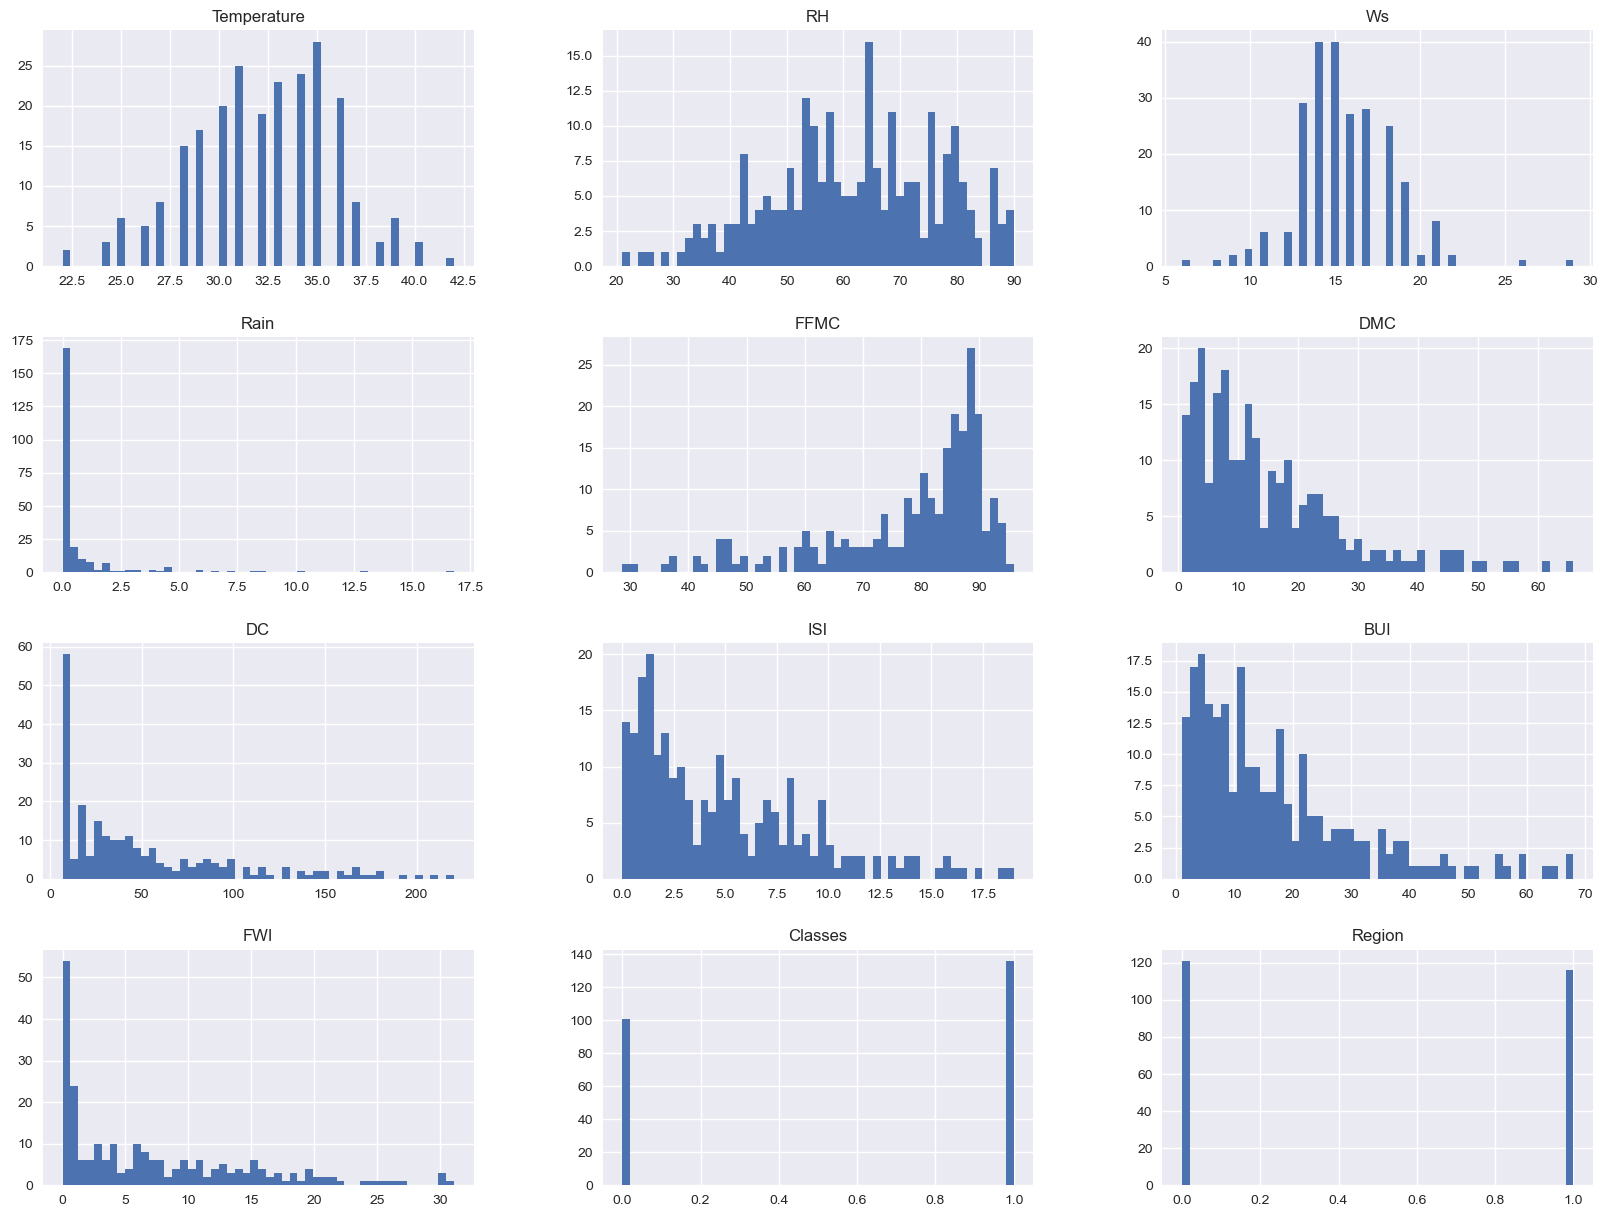

In [38]:
plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50,figsize=(20,15))
plt.show

In [39]:
# percentage for pie chart
percentage = df_copy['Classes'].value_counts(normalize=True)*100

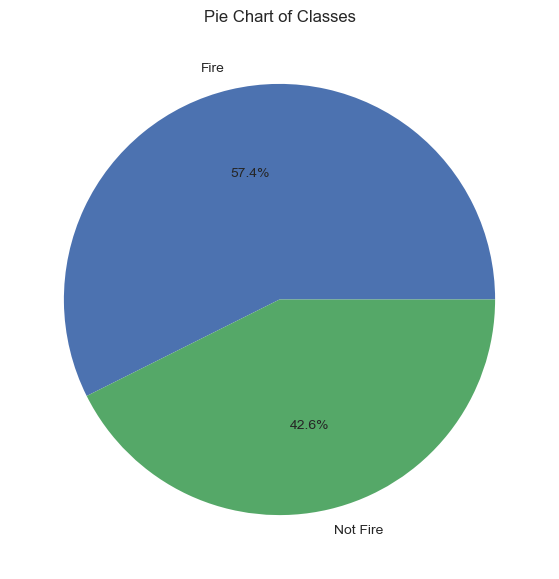

In [40]:
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

## Correlation

In [41]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.649487,-0.289908,-0.323826,0.679510,0.485523,0.374816,0.604899,0.459351,0.567851,0.513009,0.263451
RH,-0.649487,1.000000,0.253612,0.216382,-0.640799,-0.404939,-0.221519,-0.686481,-0.349585,-0.580635,-0.426943,-0.409715
Ws,-0.289908,0.253612,1.000000,0.178487,-0.187390,-0.018945,0.064157,-0.008728,0.013816,0.015008,-0.084362,-0.167253
Rain,-0.323826,0.216382,0.178487,1.000000,-0.541526,-0.287039,-0.296757,-0.345880,-0.298392,-0.323976,-0.378916,-0.043324
FFMC,0.679510,-0.640799,-0.187390,-0.541526,1.000000,0.600191,0.502872,0.739208,0.588481,0.691458,0.770093,0.229634
DMC,0.485523,-0.404939,-0.018945,-0.287039,0.600191,1.000000,0.873958,0.674752,0.981925,0.873675,0.580336,0.208838
DC,0.374816,-0.221519,0.064157,-0.296757,0.502872,0.873958,1.000000,0.500766,0.941115,0.735330,0.505117,-0.068476
ISI,0.604899,-0.686481,-0.008728,-0.345880,0.739208,0.674752,0.500766,1.000000,0.637740,0.921725,0.733213,0.280292
BUI,0.459351,-0.349585,0.013816,-0.298392,0.588481,0.981925,0.941115,0.637740,1.000000,0.855437,0.581363,0.104221
FWI,0.567851,-0.580635,0.015008,-0.323976,0.691458,0.873675,0.735330,0.921725,0.855437,1.000000,0.717246,0.214787


<Axes: ylabel='FWI'>

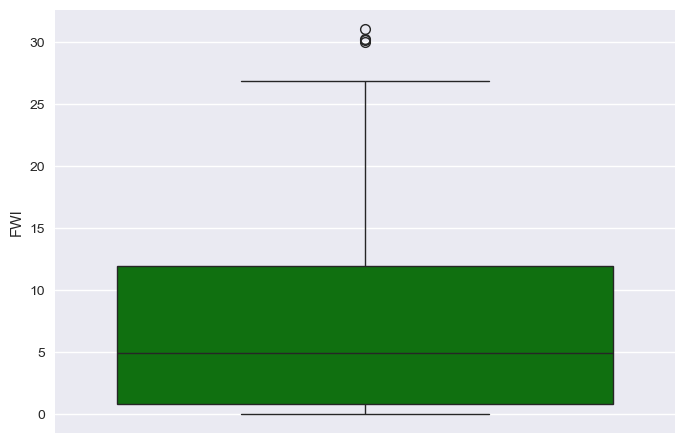

In [42]:
sns.boxplot(df['FWI'],color='green')

In [43]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Region')

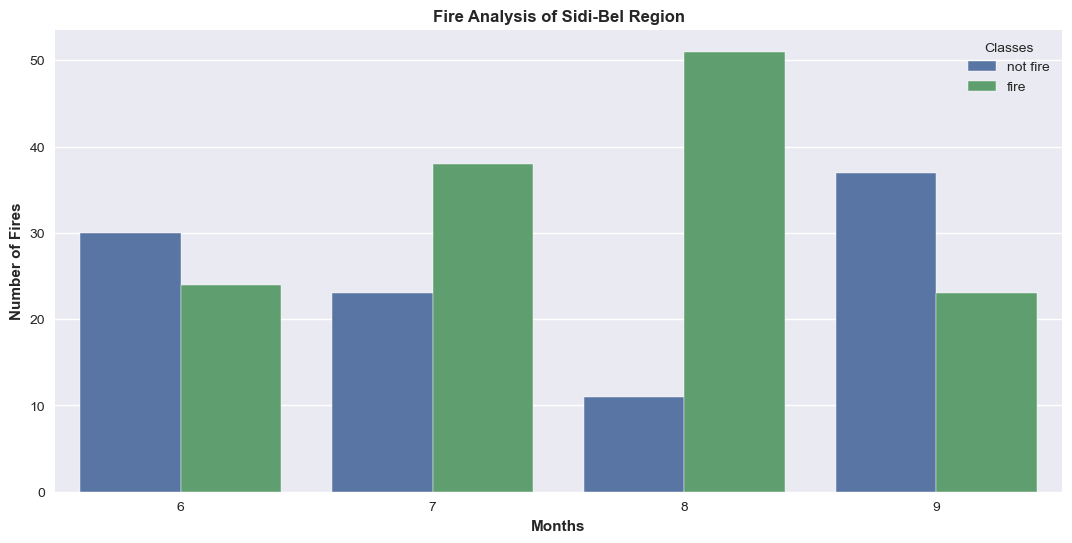

In [44]:
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi-Bel Region",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

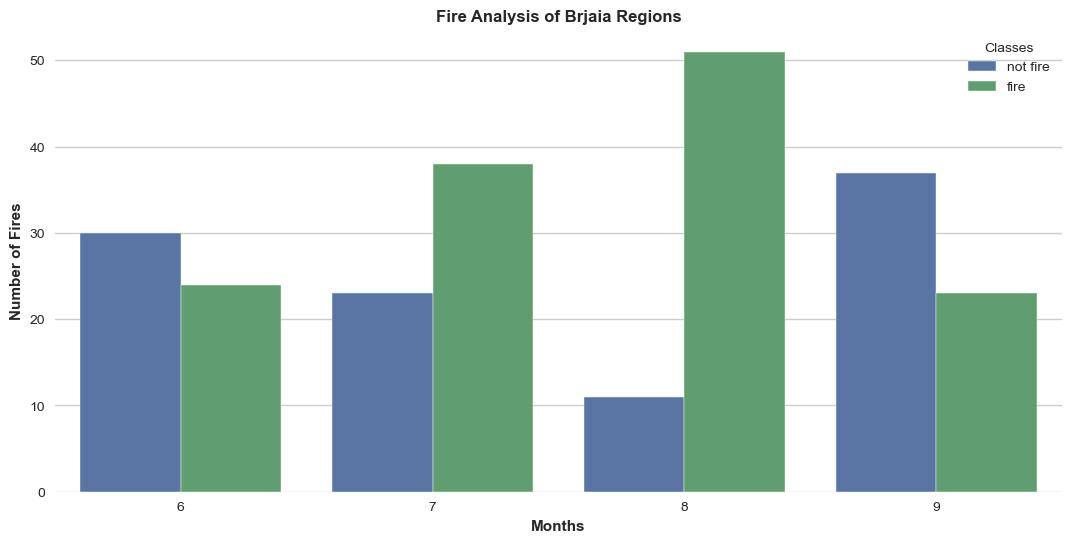

In [46]:
dftemp = df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel("Number of Fires",weight='bold')
plt.xlabel("Months",weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')